<a href="https://colab.research.google.com/github/ayushpratapsingh1/Ride-Pattern-Analysis/blob/main/Ride_Pattern_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uber Ride Analysis**





## Importing Libraries
**Description:** This block imports necessary Python libraries for data analysis and visualization.
*   `numpy`: Used for numerical operations and array handling (`np`).
*   `pandas`: Used for data manipulation and analysis, particularly with DataFrames (`pd`).
*   `matplotlib.pyplot`: Used for creating static visualizations (`plt`).
*   `seaborn`: Used for statistical data visualization (`sns`).

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

**Description:** This block loads the Uber dataset from a CSV file located in your Google Drive and displays the first few rows.

*   `pd.read_csv()`: Reads a CSV file into a pandas DataFrame.
*   `df.head()`: Displays the first 5 rows of the DataFrame `df`.

In [24]:
df = pd.read_csv("/content/drive/MyDrive/Uber Ride Analysis/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Data Preprocessing

## Checking Dataset Shape

**Description:** This block checks the number of rows and columns in the DataFrame.

*   `df.shape`: Returns a tuple representing the dimensions (rows, columns) of the DataFrame.


In [25]:
df.shape

(1156, 7)

## Dataset Information

**Description:** This block provides a summary of the DataFrame, including data types and non-null counts.

*   `df.info()`: Prints information about the DataFrame, such as column names, data types, and the number of non-null values.

df.info()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Handling Missing Values

**Description:** This block fills missing values in the 'PURPOSE' column with "NOT" and then provides updated information about the DataFrame.

*   `df.fillna()`: Fills missing values (NaN) in the DataFrame.
    *   `{"PURPOSE":"NOT"}`: Specifies that missing values in the 'PURPOSE' column should be filled with "NOT".
    *   `inplace=True`: Modifies the DataFrame directly.
*   `df.info()`: Displays updated DataFrame information.

df.fillna({"PURPOSE":"NOT"},inplace = True)
df.info()

In [27]:
df.fillna({"PURPOSE":"NOT"},inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Date and Time Conversion

**Description:** This block converts date columns to proper datetime format, extracts date and time information, and categorizes times into day/night periods.

*   `pd.to_datetime()`: Converts the 'START_DATE' and 'END_DATE' columns to datetime objects.
    *   `format='%d-%m-%Y %H:%M'`: Specifies the date-time format.
    *   `errors='coerce'`: Sets invalid parsing to NaT (Not a Time).
*   `pd.DatetimeIndex()`: Extracts date and hour from 'START_DATE'.
* `pd.cut()` : This function categorizes the time into a categorical variable which have values night, morning ,afternoon and evening.
*   `df.head()`: Displays the first 5 rows of the updated DataFrame.


In [28]:
# convert datetime to date and time with proper formatting
df['START_DATE'] = pd.to_datetime(df['START_DATE'],format='%d-%m-%Y %H:%M',errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],format='%d-%m-%Y %H:%M',errors = 'coerce')
# adding columns for date and time particularly using datetimeindex
df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour
# dividing time into day-night
df['day-night'] = pd.cut(x = df['time'],bins = [0,10,15,19,24],labels = ['Night','Morning','Afternoon','Evening'])
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-02-01,1.0,Night
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20.0,Evening
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17.0,Afternoon
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14.0,Morning


## Dropping Missing and Duplicate Values

**Description:** This block removes rows with missing values and duplicate rows from the DataFrame.

*   `df.dropna()`: Removes rows with any missing values.
    *   `inplace=True`: Modifies the DataFrame directly.
*   `df.drop_duplicates()`: Removes duplicate rows.
    *   `inplace=True`: Modifies the DataFrame directly.

In [29]:
df.dropna(inplace = True)


In [30]:
df.drop_duplicates(inplace = True)

## Exploring Unique Values

**Description:** This block identifies and counts the number of unique values in each column with object type.

*   `df.dtypes`: Returns the data types of each column.
*   `(df.dtypes == 'object')`: Checks if each column's data type is 'object' (string).
*   `list(obj[obj].index)`: Gets the column names of 'object' type columns.
*   `df[col].unique().size`: Counts the number of unique values in each column.


In [31]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

# **Data Visualization**

## Visualizing Categories and Purposes

**Description:** This block creates two count plots to visualize the distribution of 'CATEGORY' and 'PURPOSE'.

*   `plt.figure(figsize=(10, 5))`: Sets up a figure with a specified size.
*   `plt.subplot(1, 2, 1)`: Creates the first subplot (1 row, 2 columns, first plot).
*   `sns.countplot()`: Creates a count plot for 'CATEGORY'.
    *   `x = df['CATEGORY']`: Specifies the data to be plotted on the x-axis.
    *   `hue=df['CATEGORY']`: groups the category and shows distinct color.
    *   `palette='viridis'`: Sets the color palette.
*   `plt.title()`: Sets the title of the plot.
*   `plt.xticks(rotation=90)`: Rotates the x-axis labels for better readability.
*   `plt.subplot(1, 2, 2)`: Creates the second subplot.
*   `sns.countplot()`: Creates a count plot for 'PURPOSE'.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

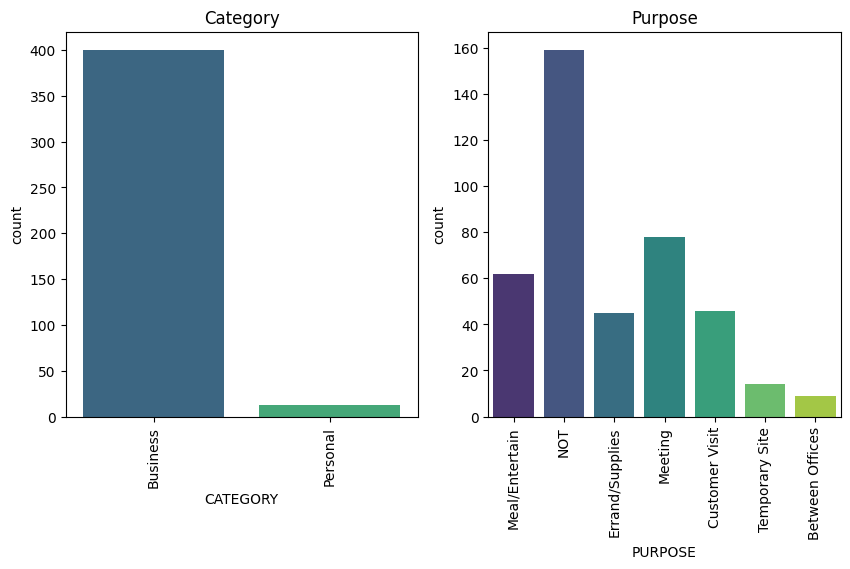

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x = df['CATEGORY'],hue=df['CATEGORY'],palette='viridis')
plt.title('Category')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(x = df['PURPOSE'],hue=df['PURPOSE'],palette='viridis')
plt.title('Purpose')
plt.xticks(rotation = 90)


## Visualizing Day-Night Distribution

**Description:** This block creates a count plot to visualize the distribution of the 'day-night' variable.

*   `sns.countplot()`: Creates a count plot for 'day-night'.
    *   `x = df['day-night']`: Specifies the data to be plotted on the x-axis.
    *   `hue=df['day-night']`: group the values and show them distinctively.
    *   `palette='viridis'`: Sets the color palette.
*   `plt.title()`: Sets the plot title.

Text(0.5, 1.0, 'Day-Night')

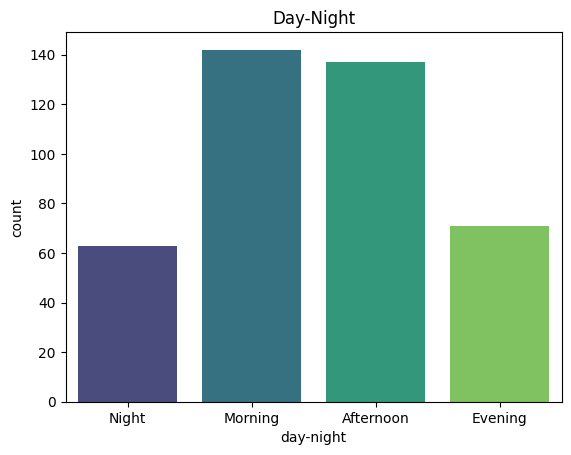

In [33]:
sns.countplot(x = df['day-night'],hue=df['day-night'],palette='viridis')
plt.title('Day-Night')

## Category and Purpose cross visualization

**Description:** This block visualizes the distribution of 'PURPOSE' grouped by 'CATEGORY'.

*   `plt.figure(figsize=(10, 5))`: Sets up a figure with a specified size.
*   `sns.countplot()`: Creates a count plot for 'PURPOSE', with 'CATEGORY' as the hue.
    *   `data=df`: Specifies the DataFrame.
    *   `x='PURPOSE'`: Specifies the data to be plotted on the x-axis.
    *   `hue='CATEGORY'`: Groups the count by 'CATEGORY'.
    *   `palette='viridis'`: Sets the color palette.
*   `plt.xticks(rotation=90)`: Rotates the x-axis labels for better readability.


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

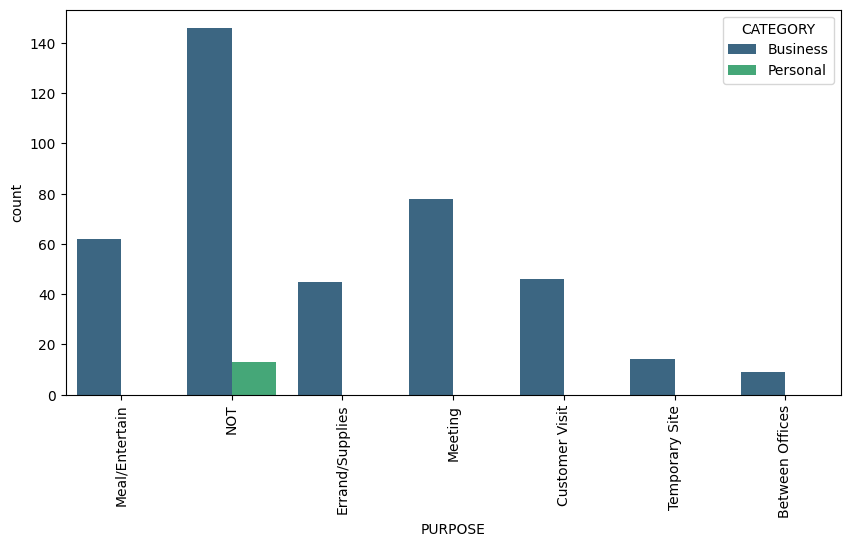

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,x = 'PURPOSE',hue = 'CATEGORY',palette='viridis')
plt.xticks(rotation = 90)

## Key Insights from Count Plots

*   **Dominant Ride Purpose: Business**
    *   Most of the rides are booked for business purposes.
*   **Primary Trip Reasons: Meetings and Meals/Entertainment**
    *   Most people book cabs for Meetings and Meal / Entertain purposes.
*   **Peak Usage Time: Afternoon (10 AM - 5 PM)**
    *   Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

## One-Hot Encoding

**Description:** This block performs one-hot encoding on the 'CATEGORY' and 'PURPOSE' columns.

*   `from sklearn.preprocessing import OneHotEncoder`: Imports the `OneHotEncoder` class.
*   `object_cols = ['CATEGORY', 'PURPOSE']`: Specifies the columns to be encoded.
*   `OneHotEncoder(sparse_output=False, handle_unknown='ignore')`: Initializes the encoder.
    *   `sparse=False`: Returns a dense array.
    *   `handle_unknown='ignore'`: Ignores unknown categories during transformation.
*   `OH_encoder.fit_transform(df[object_cols])`: Fits the encoder and transforms the specified columns.
*   `pd.DataFrame()`: Converts the transformed array to a DataFrame.
* `OH_cols.index = df.index`: adding the original data indexes to the onehot encoded data frame
* `OH_cols.columns = OH_encoder.get_feature_names_out()`: adding the column names to the one hot encoded dataframe
*   `df.drop(object_cols, axis=1)`: Drops the original 'CATEGORY' and 'PURPOSE' columns.
*   `pd.concat([df_finals, OH_cols], axis=1)`: Concatenates the original DataFrame with the one-hot encoded columns.


In [36]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY','PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_finals = df.drop(object_cols, axis = 1)
df_finals = pd.concat([df_finals,OH_cols],axis = 1)

## Correlation Heatmap

**Description:** This block creates a heatmap to visualize the correlation matrix of numerical data.

*   `df_finals.select_dtypes(include=['number'])`: Selects only numeric columns from `df_finals`.
*   `numeric_data.head()`: Displays the first 5 rows of the numeric data.
*   `sns.heatmap()`: Creates a heatmap.
    *   `numeric_data.corr()`: Calculates the correlation matrix.
    *   `cmap='BrBG'`: Sets the color map.
    *   `fmt='.2f'`: Formats the correlation values to 2 decimal places.
    *   `linewidths=2`: Sets the line width between cells.
    *   `annot=True`: Displays the correlation values in the cells.
* df.head(): displaying first 5 rows of df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Evening
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-02-01,1.0,Night
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-02-01,20.0,Evening
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-05-01,17.0,Afternoon
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-06-01,14.0,Morning


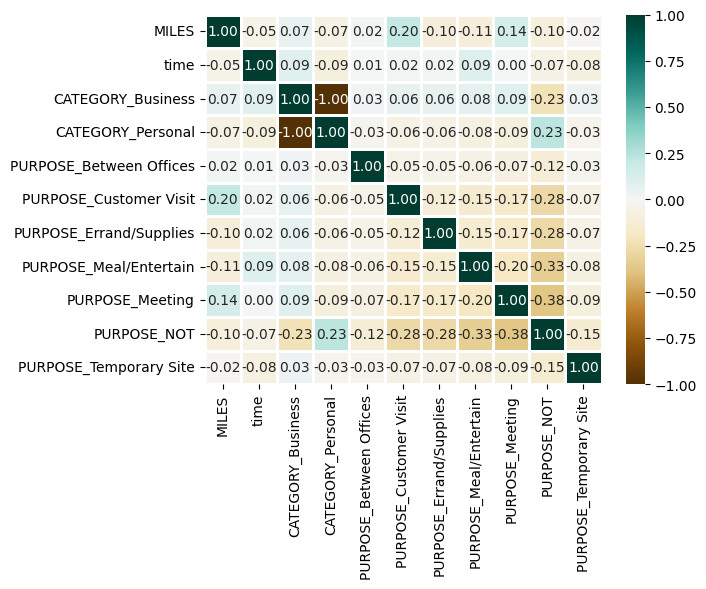

In [37]:
numeric_data = df_finals.select_dtypes(include = ['number'])
numeric_data.head()
sns.heatmap(numeric_data.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)
df.head()

## Insights from the Heatmap

*   **Negative Correlation Between Business and Personal Categories:**
    *   The heatmap reveals a high negative correlation between the "Business" and "Personal" categories. This observation supports prior findings, indicating that trips classified as "Business" are inversely related to those classified as "Personal." In essence, if a trip is categorized as one, it's less likely to be categorized as the other.
*   **Limited Feature Correlation:**
    *   The heatmap also demonstrates that there is not much significant correlation between the majority of the features in the dataset. This suggests that many of the variables are relatively independent of each other.

## Monthly Trip Analysis

**Description:** This block analyzes and visualizes trip frequency across different months.

*   `pd.DatetimeIndex(df['START_DATE']).month`: Extracts the month from 'START_DATE'.
*   `month_label`: A dictionary to map month numbers to month names.
*   `df['month'] = df.month.map(month_label)`: Replaces month numbers with month names.
*   `df.month.value_counts(sort=False)`: Counts the occurrences of each month.
* creating a new data frame to store the counts and max miles for each month
*   `sns.lineplot()`: Creates a line plot to show the trend.
    *   `data=newdf`: Specifies the data source.
*   `p.set(xlabel='MONTH', ylabel='VALUE_COUNT')`: Sets the axis labels.


[Text(0.5, 0, 'MONTH'), Text(0, 0.5, 'VALUE_COUNT')]

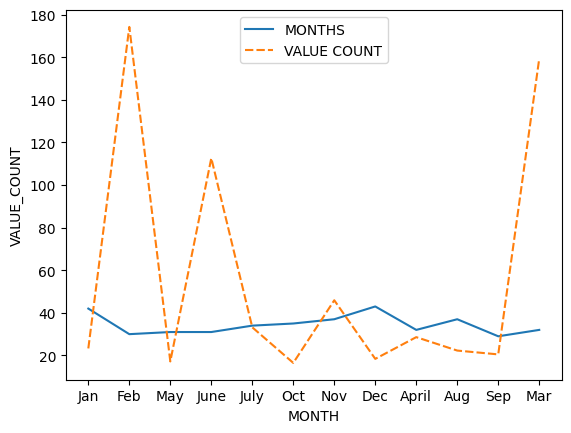

In [45]:
df['month'] = pd.DatetimeIndex(df['START_DATE']).month

month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

df['month'] = df.month.map(month_label)

mon = df.month.value_counts(sort = False)

newdf = pd.DataFrame({
    "MONTHS": mon.values,
    "VALUE COUNT": df.groupby('month', sort=False)['MILES'].max()
})


p = sns.lineplot(data = newdf)

p.set(xlabel = 'MONTH',ylabel = 'VALUE_COUNT')


## Insights from Monthly Trip Analysis Plot

*   **Irregular Monthly Trip Counts:**
    *   The plot of monthly trip analysis shows that the trip counts are very irregular across different months, indicating significant fluctuations in demand.
*   **Lower Trip Counts in Winter Months:**
    *   There is a noticeable decrease in trip counts during November, December, and January.
*   **Winter Seasonality in Florida:**
    *   The reduced trip activity in November, December, and January aligns with the winter season in Florida, US. This suggests that the colder weather may be a contributing factor to the lower demand for trips during these months.

## Daily Trip Analysis

**Description:** This block adds a column for the day of the week and maps day numbers to day names.

*   `df.START_DATE.dt.weekday`: Extracts the day of the week (0=Monday, 6=Sunday) from 'START_DATE'.
*   `day_label`: A dictionary to map day numbers to day names.
*   `df['DAY'] = df['DAY'].map(day_label)`: Replaces day numbers with day names.


In [52]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {0.0: 'Mon', 1.0: 'Tue', 2.0: 'Wed', 3.0: 'Thu',
			4.0: 'Fri', 5.0: 'Sat', 6.0: 'Sun'}
df['DAY'] = df['DAY'].map(day_label)

## Visualizing Daily Trip Frequency

**Description:** This block creates a bar plot to visualize the frequency of trips on each day of the week.

*   `df.DAY.value_counts()`: Counts the occurrences of each day.
*   `sns.barplot()`: Creates a bar plot.
    *   `x=day_label.index`: Sets the x-axis to day names.
    *   `y=day_label`: Sets the y-axis to the counts.
*   `plt.xlabel('DAYS')`: Sets the x-axis label.
*   `plt.ylabel('VALUE COUNT')`: Sets the y-axis label.

Text(0, 0.5, 'VALUE COUNT')

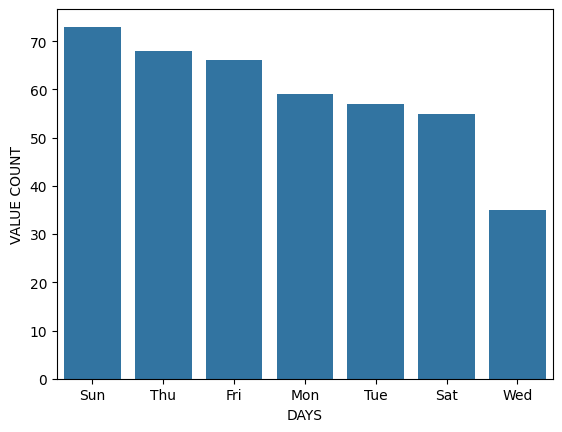

In [53]:
day_label = df.DAY.value_counts()
sns.barplot(x = day_label.index,y = day_label)
plt.xlabel('DAYS')
plt.ylabel('VALUE COUNT')

## Box Plot for Miles

**Description:** This block creates a box plot to visualize the distribution of the 'MILES' variable.

*   `sns.boxplot()`: Creates a box plot.
    *   `y=df['MILES']`: Specifies the data to be plotted on the y-axis.


<Axes: ylabel='MILES'>

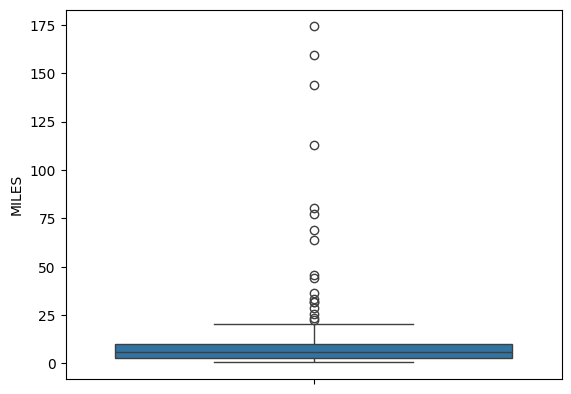

In [58]:
sns.boxplot(y = df['MILES'])

## Box Plot for Miles (Filtered)

**Description:** This block creates a box plot to visualize the distribution of the 'MILES' variable for trips less than 100 miles.

*   `sns.boxplot()`: Creates a box plot.
    * `df[df["MILES"]<100]["MILES"]`: Specifies the data to be plotted on the y-axis after filtering to contain only miles less than 100.


<Axes: ylabel='MILES'>

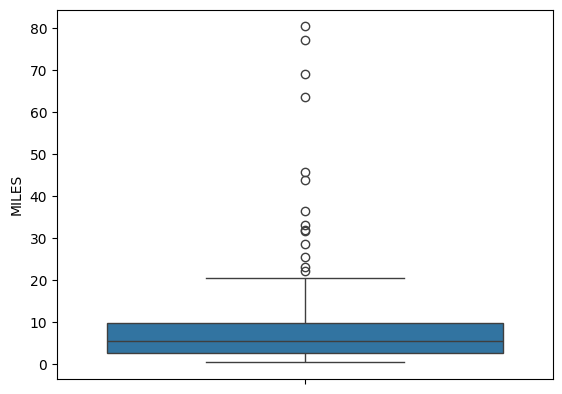

In [60]:
sns.boxplot(df[df["MILES"]<100]["MILES"])

## Distribution Plot for Miles (Filtered)

**Description:** This block creates a distribution plot (histogram) to visualize the distribution of the 'MILES' variable for trips less than 40 miles.

*   `sns.displot()`: Creates a distribution plot.
    * `df[df["MILES"]<40]["MILES"]`: Specifies the data to be plotted after filtering to contain only miles less than 40.


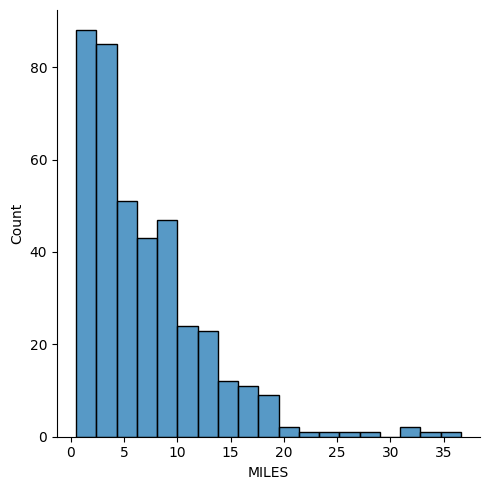

In [61]:
sns.displot(df[df["MILES"]<40]["MILES"])

## Key Insights on Trip Distance Analysis

Based on the distribution plots and box plots generated, we can conclude the following about trip distances:

*   **Dominant Distance Range: 4-5 Miles:** A significant portion of cab bookings are for trips covering a distance of 4 to 5 miles. This suggests that this distance range represents a common use case for cab services within the dataset.
*   **Preferred Distance Range: 0-20 Miles:** The majority of customers choose cabs for trips within the 0 to 20-mile range. This indicates that cabs are primarily used for short to moderate-distance travel.
*   **Negligible Long-Distance Trips:** The number of cab bookings for distances exceeding 20 miles is very low. This suggests that cabs are rarely used for long-distance journeys, and that people prefer other forms of transportation for trips greater than 20 miles.
* **Outliers in the dataset** : There are some outliers in the data , because of that the user has filtered the miles less than 100 and also miles less than 40 to get the proper insight from the data.

# Uber Ride Analysis: Key Findings and Insights

This document summarizes the key findings and insights derived from the Uber ride data analysis. The analysis covers data preprocessing, exploratory data analysis (EDA), and visualization to uncover patterns and trends in Uber usage.

## Key Findings and Insights

The analysis can be broken down into several categories, each providing specific insights:

### 1. Trip Characteristics

*   **Dominant Ride Purpose: Business**
    *   The majority of recorded rides are for business purposes. This suggests that the dataset may either be heavily influenced by business travel, or that business trips are taken more frequently than personal trips.
*   **Primary Trip Reasons: Meetings and Meals/Entertainment**
    *   The most common reasons for booking rides are for attending meetings and for meals/entertainment purposes. This indicates that Uber is frequently used for work-related travel and social outings.

### 2. Temporal Patterns

*   **Peak Usage Time: Afternoon (10 AM - 5 PM)**
    *   The highest volume of cab bookings occurs between 10 AM and 5 PM, which aligns with typical business hours, lunch breaks, or the end of the workday.
*   **Irregular Monthly Trip Counts**
    *   Trip counts fluctuate significantly across different months, suggesting a variable demand that might be influenced by seasonality or external events.
*   **Lower Trip Counts in Winter Months**
    *   There is a clear decrease in trip counts during November, December, and January.
*   **Winter Seasonality in Florida**
    *   The reduced activity in these months corresponds with the winter season in Florida, USA. Colder weather may play a role in the lower demand.
*   **Daily Usage Patterns**
    *   To determine which days of the week have the highest trip frequencies, run the bar plot code cell which is made for daily trip analysis. This code cell shows the distribution of trips across each day of the week.

### 3. Distance Analysis

*   **Dominant Distance Range: 4-5 Miles**
    *   A large portion of cab bookings are for trips within the 4-5 mile range, which indicates this as a common use case for Uber in the dataset.
*   **Preferred Distance Range: 0-20 Miles**
    *   Most customers prefer using cabs for trips in the 0-20 mile range, suggesting that Uber is primarily used for short to moderate-distance travel.
*   **Negligible Long-Distance Trips**
    *   Very few bookings are made for distances over 20 miles, indicating that cabs are not the preferred mode of transport for long-distance travel.
*   **Outliers**
    *   The presence of outliers in the data has required data filtering (e.g., miles less than 100 or 40) to improve the clarity of insights from visualizations.

### 4. Categorical Variable Relationships

*   **Negative Correlation Between Business and Personal Categories**
    *   A strong negative correlation exists between "Business" and "Personal" trip categories. This suggests that a trip classified as one is less likely to be classified as the other.
*   **Limited Feature Correlation**
    *   Most other features in the dataset do not show significant correlations with each other, indicating they are relatively independent.

### 5. Data Distribution
* **Category and Purpose Distribution**
    * The count plots visually summarize the frequency of categories and purposes. To see these distributions, run the code cell which have category and purpose count plots.
* **Day-Night distribution**
    * The count plot which represents the day-night analysis , shows the frequency of the trip based on the time which is divided into day and night. to get this result , the respective code cell should be executed.
* **Data Preprocessing**
    * Missing values in the 'PURPOSE' column are filled with "NOT."
    * Date columns are converted to proper datetime format.
    * Date and time information is extracted.
    * Time is categorized into day/night periods.
    * Missing and duplicate values are dropped.
    * Unique values in object columns are explored.
    * One Hot Encoding is done for categorical variables to convert the categorical values to numerical one.

## Conclusion

Through my analysis of Uber ride data, I successfully identified important usage patterns and preferences. The findings highlight the practicality of Uber for business purposes and short-to-moderate distance trips. Insights into seasonality, as well as daily and hourly usage patterns, provide valuable guidance for making informed business decisions to improve service and optimize resource allocation. Overall, I thoroughly analyzed the data and identified key information to support strategic planning.

### [Github](https://github.com/ayushpratapsingh1/Ride-Pattern-Analysis) | [LinkedIn](https://www.linkedin.com/in/ayushpratapsingh1/)
